In [8]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('ecommerce_dataset_updated.csv')
df.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [4]:
df.shape

(3660, 8)

In [34]:
df['Purchase_Date']=pd.to_datetime(df['Purchase_Date'],format='%d-%m-%Y')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   User_ID           3660 non-null   object        
 1   Product_ID        3660 non-null   object        
 2   Category          3660 non-null   object        
 3   Price (Rs.)       3660 non-null   float64       
 4   Discount (%)      3660 non-null   int64         
 5   Final_Price(Rs.)  3660 non-null   float64       
 6   Payment_Method    3660 non-null   object        
 7   Purchase_Date     3660 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 228.9+ KB


In [6]:
df.describe()

,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


## Analysis for numeric data

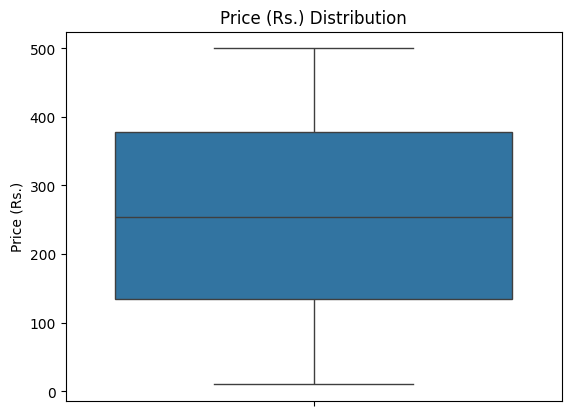

In [114]:
sns.boxplot(df['Price (Rs.)'])
plt.title('Price (Rs.) Distribution')
plt.show()

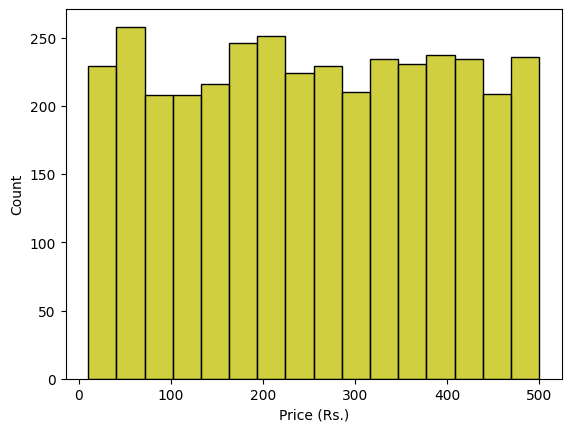

In [117]:
sns.histplot(x=df['Price (Rs.)'],color='y')
plt.show()

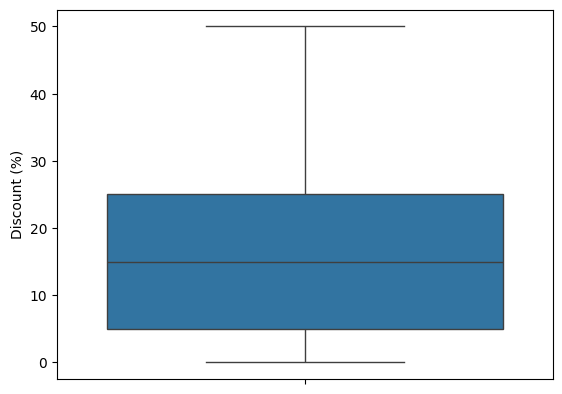

In [11]:
sns.boxplot(df['Discount (%)'])
plt.show()

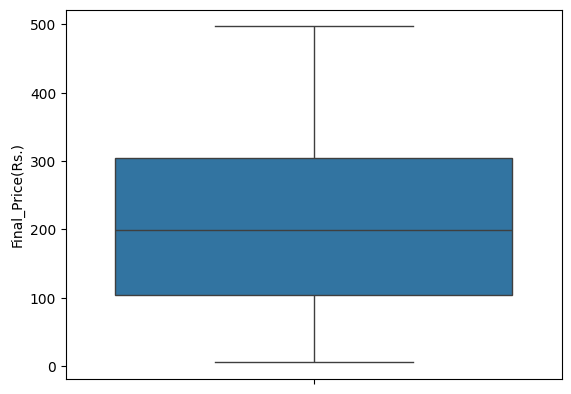

In [54]:
sns.boxplot(df['Final_Price(Rs.)'])
plt.show()

## Catogery Analysis

In [21]:
df.dtypes[df.dtypes=='object'].index

Index(['User_ID', 'Product_ID', 'Category', 'Payment_Method', 'Purchase_Date'], dtype='object')

#### Catogery & Sales

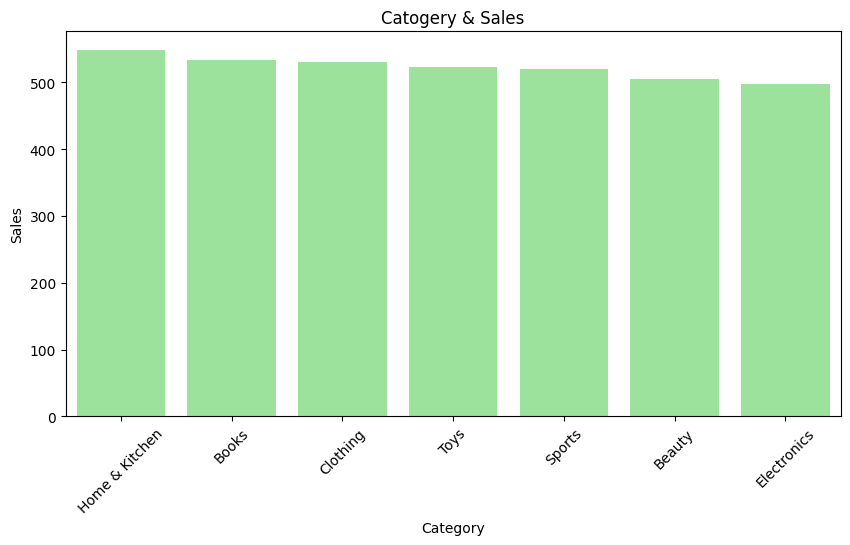

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Category'],color='lightgreen',order=df['Category'].value_counts().index)
plt.title('Catogery & Sales')
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.show()

#### Payment_Method & Sales

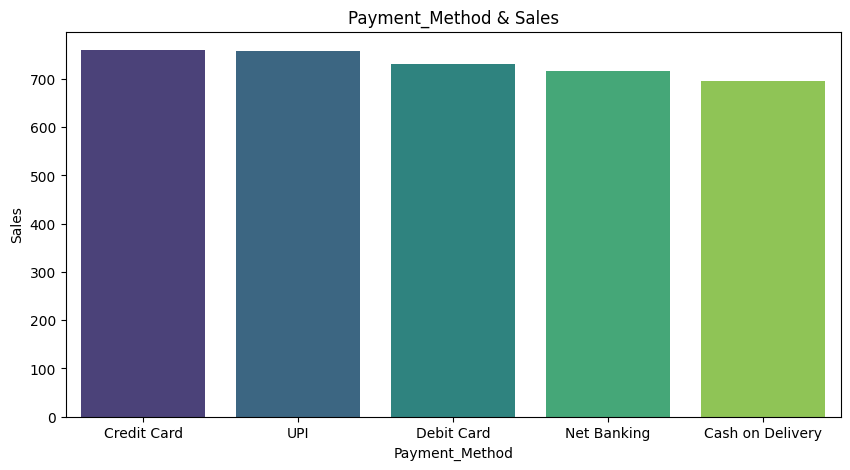

In [102]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Payment_Method'],order=df['Payment_Method'].value_counts().index,palette='viridis')
plt.title('Payment_Method & Sales')
plt.ylabel('Sales')
plt.show()

In [39]:
category_price=df.groupby('Category')['Final_Price(Rs.)'].sum()

In [40]:
category_price

Category
Beauty            104215.10
Books             111149.35
Clothing          115314.84
Electronics       100462.23
Home & Kitchen    110328.08
Sports            108518.79
Toys              107289.69
Name: Final_Price(Rs.), dtype: float64

#### Catogery per price

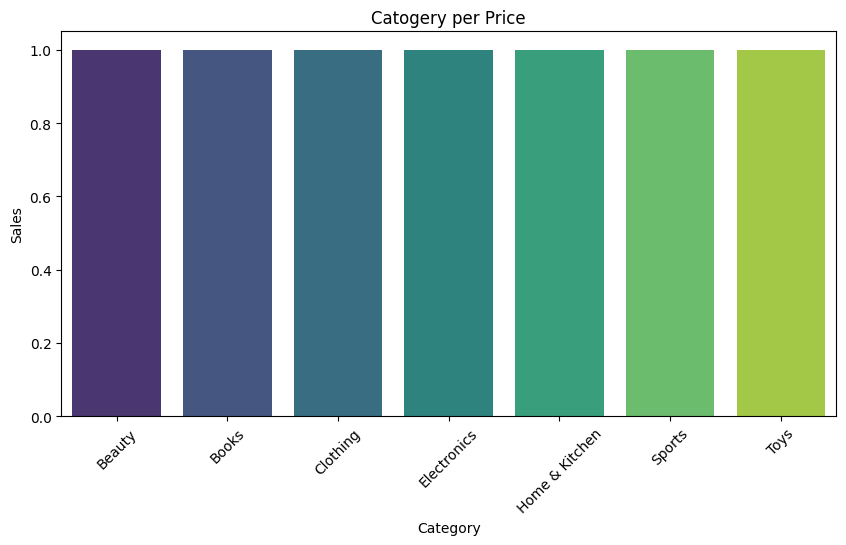

In [113]:
plt.figure(figsize=(10,5))
sns.countplot(category_price,palette='viridis',order=category_price.index)
plt.title('Catogery per Price')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

#### Top 10 Product

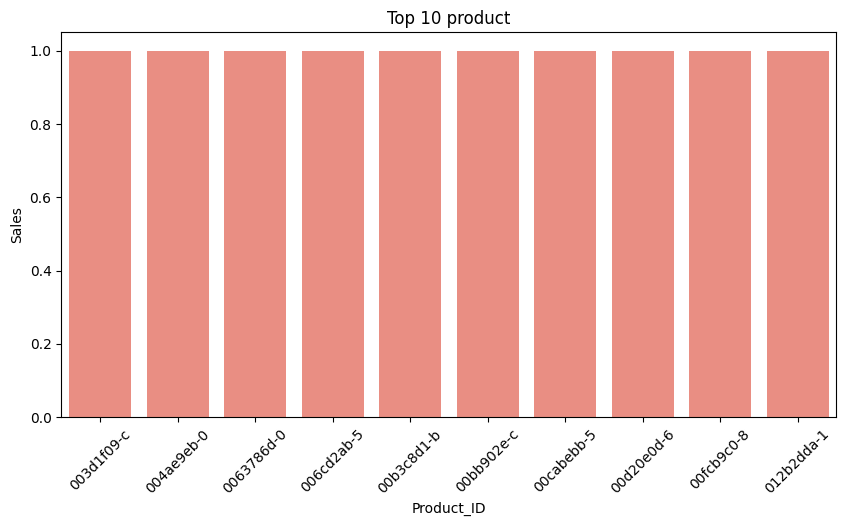

In [75]:
top10Product=df.groupby('Product_ID').size().head(10)
plt.figure(figsize=(10,5))
sns.barplot(top10Product,color='salmon')
plt.title('Top 10 product')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

#### Correlarion 

<Axes: >

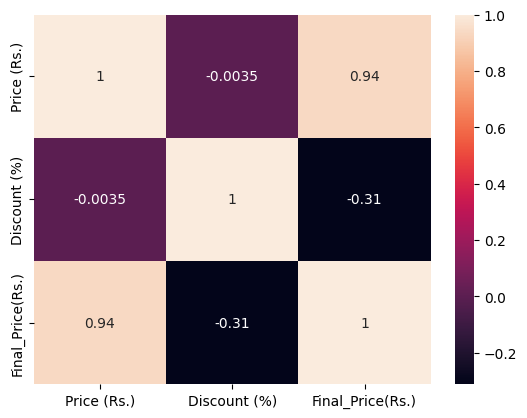

In [111]:
cor=df[[]]
cols=df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index
sns.heatmap(df[cols].corr(),annot=True)

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.cluster import KMeans

In [119]:
encoded_df=df.copy()
encoded_df=pd.get_dummies(encoded_df,columns=['Payment_Method'])
x=encoded_df[['Price (Rs.)','Discount (%)']+[col for col in encoded_df.columns if 'Payment_Method' in col ]]
y=encoded_df['Final_Price(Rs.)']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

lr=LinearRegression()
lr.fit(x_train,y_train)
yhat_reg=lr.predict(x_test)

print('mean_squared_error= ',mean_squared_error(y_test,yhat_reg))
print('train_score= ',lr.score(x_train,y_train))
print('r2score= ',r2_score(y_test,yhat_reg))

mean_squared_error=  512.4880548141891
train_score=  0.9718485236820606
r2score=  0.9647690090099439


In [118]:
Rdg=Ridge()
Rdg.fit(x_train,y_train)
yhat_ridge=Rdg.predict(x_test)

print('mean_squared_error= ',mean_squared_error(y_test,yhat_ridge))
print('train_score= ',Rdg.score(x_train,y_train))
print('r2score= ',r2_score(y_test,yhat_ridge))

mean_squared_error=  512.4856050356475
train_score=  0.9718485236213478
r2score=  0.9647691774199681


In [120]:
df.columns

Index(['User_ID', 'Product_ID', 'Category', 'Price (Rs.)', 'Discount (%)',
       'Final_Price(Rs.)', 'Payment_Method', 'Purchase_Date'],
      dtype='object')

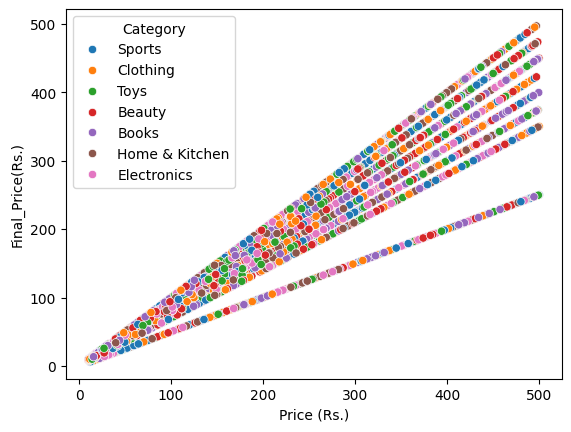

In [128]:
sns.scatterplot(x=df['Price (Rs.)'],y=df['Final_Price(Rs.)'],hue=df['Category'])
plt.show()

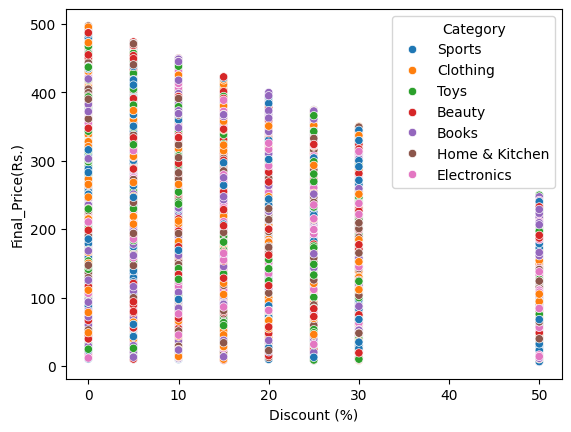

In [129]:
sns.scatterplot(x=df['Discount (%)'],y=df['Final_Price(Rs.)'],hue=df['Category'])
plt.show()

<Axes: >

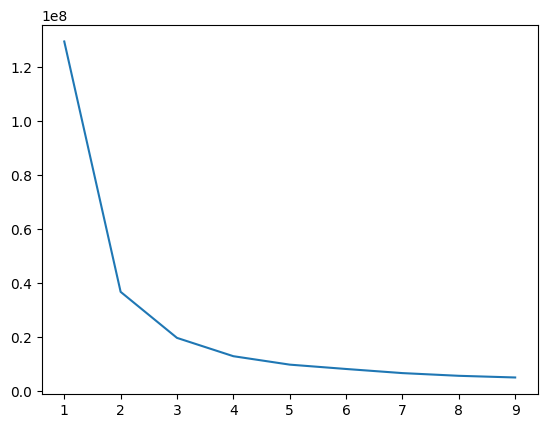

In [134]:
x_cluster=df[['Discount (%)','Final_Price(Rs.)','Price (Rs.)']]
wscc=[]
for i in range(1,10):
    km=KMeans(i)
    km.fit(x_cluster)
    wscc.append(km.inertia_)

sns.lineplot(x=range(1,10),y=wscc,markers='o')

In [142]:
km=KMeans(3)

df['Cluster']=km.fit_predict(x_cluster)

In [143]:
df.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date,Cluster
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,2024-11-12,2
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,2024-02-09,0
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,2024-09-01,0
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,2024-04-01,2
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,2024-09-27,0


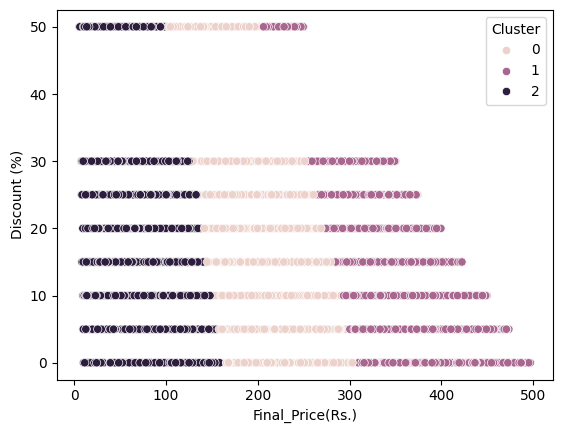

In [144]:
sns.scatterplot(y=df['Discount (%)'],x=df['Final_Price(Rs.)'],hue=df['Cluster'])
plt.show()

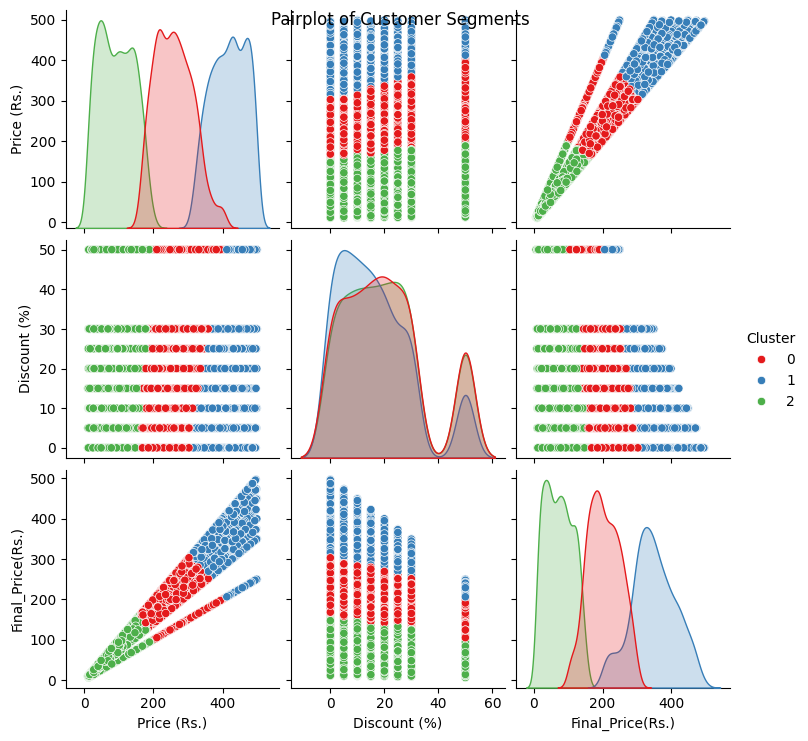

In [147]:

sns.pairplot(df[['Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)', 'Cluster']], hue='Cluster', palette='Set1')
plt.suptitle('Pairplot of Customer Segments')
plt.show()